Goal: 
To create a log reg model that will successfully predict strokes

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [2]:
#Load dataframe
#Linux
#df = pd.read_csv('/home/tommy/Documents/Data Science/Projects Attempt 2/Log Reg/healthcare-dataset-stroke-data.csv')
#df.head(5)

#WINdows 10
df = pd.read_csv("C:\\Users\\tchen\\Documents\\Data science\\Notebooks to clean\\Log Reg - USE THIS\\healthcare-dataset-stroke-data.csv")

In [3]:
#####EDA start

In [4]:
#1Examine Data
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.describe()

#.0947 get hypertension
#.054 get heart disease
#Average age for dataset is 43

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.shape

(5110, 12)

In [7]:
#Class imbalannce of strokes?
df['stroke'].value_counts()

#Yes there is - roughly a 1:20 ratio
#QUESTION: Does logistic regression have class imbalance as it is not a classification algorithm but a regression algorithm?
##Answer: It is not a classification algoirthm but a regression algoirthm.
#HOWEVER, it is a classification algoirthm in combination with a decision rule that makes dichotomous the predicted probabilities of the outcome

0    4861
1     249
Name: stroke, dtype: int64

In [8]:
#Note: Do 2 df describes, 1 for those who have had a had a stroke and those who havent
stroke_df = df[df['stroke'] == 1]
noStrokeDf = df[df['stroke'] == 0]

In [9]:
stroke_df.describe()
#Older age, higher rate of hypertension, heart disease, glucose level, BMI
#Question: How to statistically test if there is a difference between 2 datasets?
#Answer: t-test is used to test the difference between 2 datasets. It doesn't work in this case 

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,249.000000,249.000000,249.000000,249.000000,249.000000,209.000000,249.0
mean,37115.068273,67.728193,0.265060,0.188755,132.544739,30.471292,1.0
std,21993.344872,12.727419,0.442254,0.392102,61.921056,6.329452,0.0
min,210.000000,1.320000,0.000000,0.000000,56.110000,16.900000,1.0
25%,17013.000000,59.000000,0.000000,0.000000,79.790000,26.400000,1.0
50%,36706.000000,71.000000,0.000000,0.000000,105.220000,29.700000,1.0
75%,56669.000000,78.000000,1.000000,0.000000,196.710000,33.700000,1.0
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


In [10]:
noStrokeDf.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4700.000000,4861.0
mean,36487.236371,41.971545,0.088871,0.047110,104.795513,28.823064,0.0
std,21120.133386,22.291940,0.284586,0.211895,43.846069,7.908287,0.0
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.0
25%,17762.000000,24.000000,0.000000,0.000000,77.120000,23.400000,0.0
50%,36958.000000,43.000000,0.000000,0.000000,91.470000,28.000000,0.0
75%,54497.000000,59.000000,0.000000,0.000000,112.830000,33.100000,0.0
max,72940.000000,82.000000,1.000000,1.000000,267.760000,97.600000,0.0


In [11]:
####Categorical variables analysis


In [12]:
#1.df with just categorical variables
df_categorical = df[['gender', 'work_type', 'Residence_type', 'smoking_status']]


In [13]:
#2. Examine the nulls for each category
df_categorical.isnull().sum()

gender            0
work_type         0
Residence_type    0
smoking_status    0
dtype: int64

In [14]:
#3. Frequency of the categorical variables
for col in df_categorical:
    print(df_categorical[col].value_counts())
    print('----------------------------------------------')

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
----------------------------------------------
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
----------------------------------------------
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
----------------------------------------------
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
----------------------------------------------


In [15]:
#4. For each category, what % of the data do they represent 
#3. Frequency of the categorical variables
for col in df_categorical:
    print((df_categorical[col].value_counts()/len(df_categorical[col]))*100)
    print('----------------------------------------------')

Female    58.590998
Male      41.389432
Other      0.019569
Name: gender, dtype: float64
----------------------------------------------
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: work_type, dtype: float64
----------------------------------------------
Urban    50.802348
Rural    49.197652
Name: Residence_type, dtype: float64
----------------------------------------------
never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: smoking_status, dtype: float64
----------------------------------------------


In [16]:
#5. cardinality check (how many )
for col in df_categorical:
    print(col)
    print(len(df_categorical[col].value_counts()))

gender
3
work_type
5
Residence_type
2
smoking_status
4


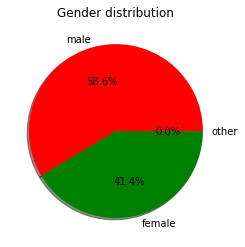

In [17]:
#6 Explore each individual categorical variable if necessary
gender = df_categorical['gender'].value_counts()
pie_labels = 'male', 'female' , 'other'
pie_colors = 'red', 'green'
plt.pie(gender, labels =  pie_labels, colors = pie_colors, shadow = True, autopct='%1.1f%%')
plt.title('Gender distribution')
plt.show()

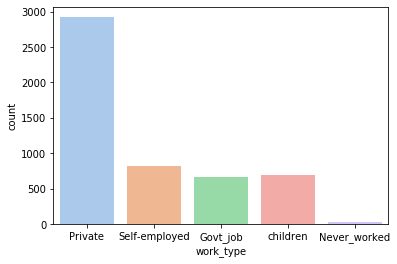

In [18]:
work_type = df_categorical['work_type'].value_counts()
sns.countplot( x = 'work_type', data = df_categorical, palette = 'pastel')


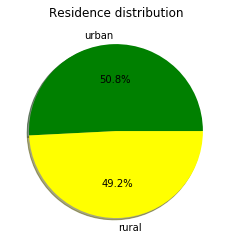

In [19]:
residence = df_categorical['Residence_type'].value_counts()
residence_labels = 'urban', 'rural'
residence_colors = 'green', 'yellow'
plt.pie(residence, labels = residence_labels, colors = residence_colors, shadow = True, autopct='%1.1f%%')
plt.title('Residence distribution')
plt.show()

In [20]:
df_categorical['smoking_status'].value_counts()
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

<BarContainer object of 4 artists>

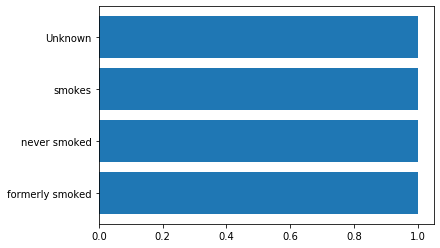

In [21]:
#Barh chart is too confusing. Skipping
smoking = df_categorical['smoking_status'].unique()
plt.barh(smoking, width = 1)

In [22]:
#7 One hot encoding (if necessary?)
df_dummies = pd.get_dummies(df_categorical)

In [23]:
#####Quantitative variables

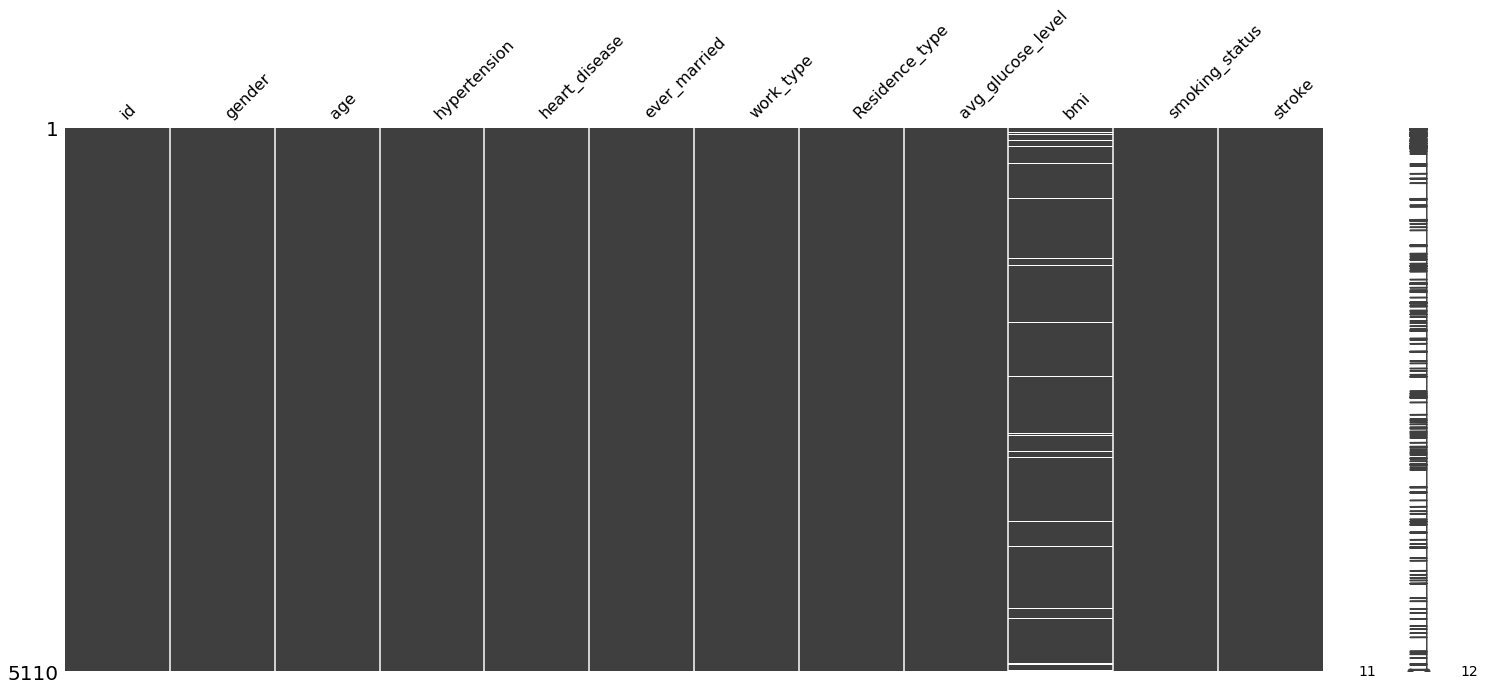

In [24]:
#Check for missing data/null?

#Using missingno library
import missingno as mn
mn.matrix(df)

#Question: Is the missing data - MCAR,MAR,MNAR?

In [25]:
df.head(5)
df_quant = df[['gender', 'age', 'avg_glucose_level','bmi']]

In [26]:
#Clean up missing data as needed
df_quant.dtypes

gender                object
age                  float64
avg_glucose_level    float64
bmi                  float64
dtype: object

In [27]:
#4Identify shape of the vars
df_quant.shape

(5110, 4)

In [28]:
#outlier detection


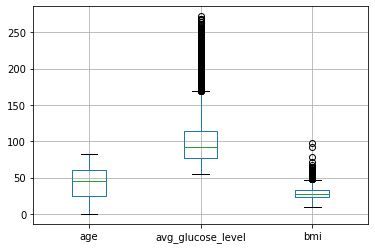

In [29]:
#boxplot viz
df_quant.boxplot()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED3E8534C8>,
      dtype=object)

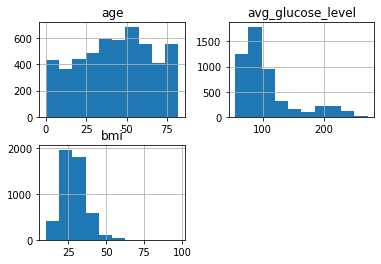

In [30]:
#hist plots
df_quant.hist()

In [31]:
df_quant

,gender,age,avg_glucose_level,bmi
0,Male,67.0,228.69,36.6
1,Female,61.0,202.21,NaN
2,Male,80.0,105.92,32.5
3,Female,49.0,171.23,34.4
4,Female,79.0,174.12,24.0
...,...,...,...,...
5105,Female,80.0,83.75,NaN
5106,Female,81.0,125.20,40.0
5107,Female,35.0,82.99,30.6
5108,Male,51.0,166.29,25.6


In [32]:
#identify significant correlations
#sns.heatmap(df_quant)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
####Mahine learning model from scratch

In [ ]:
#train test split the data

In [34]:
#sigmoid
z = np.dot(theta, X.T)

def sigmoid(z):
    op = 1/1+(np.ecp(-z))
    return op

NameError: name 'theta' is not defined

In [40]:
#Loss function 
'''
h = sigmoid(z)
np.mean((-y*np.log(h)) - ((1-y).T*log(1-h)))
'''

'\nh = sigmoid(z)\nnp.mean((-y*np.log(h)) - ((1-y).T*log(1-h)))\n'

In [41]:
#Gradient descent
def gradient_descent(X,h,y):
    return (np.dot(X.T, (h-y)))/y.shape[0]

In [42]:
#Function for fitting the minimizing the gradient
def fit(lr, iterations):
    for i in range(iterations):
        sigma = sigmoid(X, weight) #Calculating sigmoid
        loss = loss(sigma, y) #Y_hat - y essentially)
        dW = gradient_descent(X,sigma, y) #Calculates the gradient at a specific sigmoid/X position
        weight = weight - (lr * dW) #Updating the weights by weight(aka previus gradient) - (new gradient)

In [43]:
#Method to predict the class label
def predict(x_new, threshold):
    x_new = np.concatenate((itercept, x_new), axis = 1)
    result = sigmoid(x_new, weight)
    result = result >= threshold
    y_pred = np.zeros(result.shape[0])
    for i in range(len(y_pred)):
        if result[i] == True:
            y_pred[i] = 1
        else:
            continue
    return y_pred

In [44]:
##Notes
'''
Theta/weights get updated through gradient descent.
Initializes as a vector of 0s with length x.shape[0]

Weights get optimizes as you iterate BECAUSE the weight starts at 0 then in the next iteration is given an 
"actual weight" that is non zero from the log reg algorithm
From there, the "actual weight" continues to be optimized as you continue to iterate
This process delivers the minimum because if the Gradient descent iterations goes past the local min, 
Then you'll see it in the loss graph and understand that gradient descent does not continue to minimize loss 
BUT rather incrases

source:
https://www.askpython.com/python/examples/logistic-regression-from-scratch

'''

'\nTheta/weights get updated through gradient descent.\nInitializes as a vector of 0s with length x.shape[0]\n\nWeights get optimizes as you iterate BECAUSE the weight starts at 0 then in the next iteration is given an \n"actual weight" that is non zero from the log reg algorithm\nFrom there, the "actual weight" continues to be optimized as you continue to iterate\nThis process delivers the minimum because if the Gradient descent iterations goes past the local min, \nThen you\'ll see it in the loss graph and understand that gradient descent does not continue to minimize loss \nBUT rather incrases\n\nsource:\nhttps://www.askpython.com/python/examples/logistic-regression-from-scratch\n\n'

In [45]:
from numpy import log, dot, e
from numpy.random import rand

class LogisticRegression:
    
    def sigmoid(self, z):
        return 1/(1+e**(-z))
    
    def cost_function(self, X,y, weights):
        z = dot(X, weights)
        predict_1 = y*log(self.sigmoid(z)) 
        predict_0 = (1-y) * log(1-self.sigmoid(z)) 
        return -sum(predict_1+predict_0)/len(X)

    def fit(self, X,y, epochs = 25, lr = 0.05):
        loss = []
        weights = rand(X.shape[1])
        N = len(X)
        
        for _ in range(epochs):
            #Gradient descent
            y_hat = self.sigmoid(dot(X, weights))
            weights -= lr * dot(X.T, y_hat - y)/N
            
            #Saving progress
            loss.append(self.cost_function(X,y,weights))
        
        self.weights= weights
        self.loss = loss
    
    def predict(self, X):
        z = dot(X,self.weights)
        return[1 if i > 0.5 else 0 for i in self.sigmoid(z)]

In [46]:
def predict(self, X):        
    # Predicting with sigmoid function
    z = dot(X, self.weights)
    # Returning binary result
    return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]


In [78]:
df['stroke'][0]

1

In [83]:
X_train[0:1]

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
3565,40.0,0,0,1,0,65.77,31.2


In [84]:
pre

TypeError: predict() missing 1 required positional argument: 'X'

In [47]:
#How to use variables that are categorical?
#If a variable is 0,1, does that mean they are ready to use?

'''
#Model features and target:
-Target = stroke
-Features:
    Age
    Avg. glucose level
    BMI
    Residence type
    Ever married
'''

'\n#Model features and target:\n-Target = stroke\n-Features:\n    Age\n    Avg. glucose level\n    BMI\n    Residence type\n    Ever married\n'

In [48]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [49]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [50]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [51]:
#Transforming 'Residence_type' to 0s and 1s. 0 = urban, 1 = rural
df['Residence_type'] = [0 if x == 'Urban' else 1 for x in df['Residence_type']]

In [52]:
#Transform 'ever_married' to 0s and 1s. 0 = No, 1 = yes
df['ever_married'] = [0 if x == 'No' else 1 for x in df['ever_married']]

In [53]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,0,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,1,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,1,Private,1,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,0,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,1,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,1,Private,0,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,1,Self-employed,0,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,1,Self-employed,1,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,1,Private,1,166.29,25.6,formerly smoked,0


In [54]:
df = df.dropna()

In [55]:
#Setting up target and feature variables.
y = df['stroke']
X = df[['age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi']]

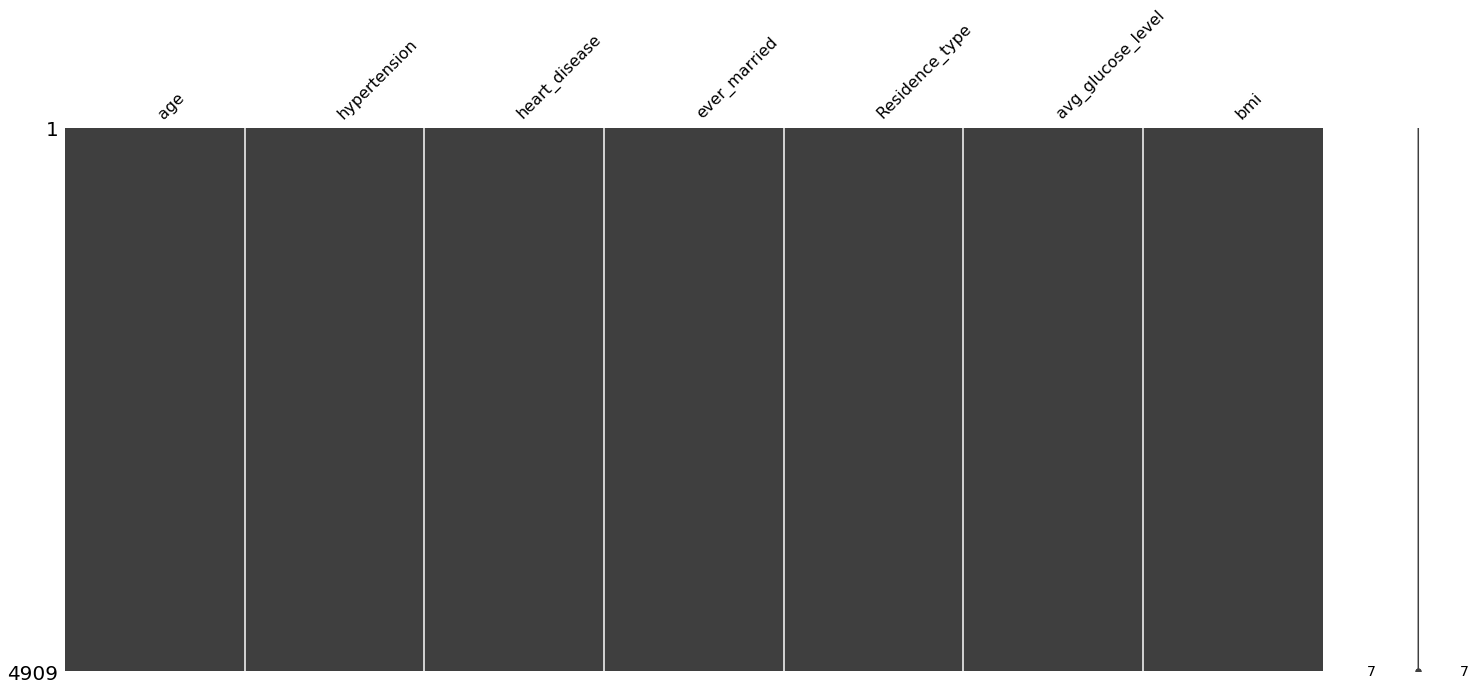

In [56]:
msno.matrix(X)

In [57]:
y.unique()

array([1, 0], dtype=int64)

In [58]:
import missingno as msno


In [59]:
#dropping missing values in X
#X = X.dropna()

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [74]:
model = LogisticRegression()
model.fit(X,y, epochs = 25, lr = 0.01)


In [87]:
X.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi'],
      dtype='object')

In [75]:
model.weights

array([ 0.03778179,  0.8378395 ,  0.02636452,  0.56341314,  0.93452772,
       -0.02463057, -0.1269934 ])

In [76]:
model.loss
#REFLECTION: Model divides by zero. Need to find values of 0 to impute/removeA
#Why are some of the model values negative?

[1.3902366285346461,
 0.9620392600041023,
 0.5356208450182178,
 0.458259942876526,
 1.5342001908925846,
 1.105985549924576,
 0.6778483444508023,
 0.2647272003537649,
 1.4439281957358514,
 5.186647924697589,
 4.758432342670644,
 4.33021676064369,
 3.9020011786167403,
 3.4737855965897917,
 3.0455700145628435,
 2.6173544325360973,
 2.189138850517945,
 1.7609232689241463,
 1.3327077172901696,
 0.9044962084874917,
 0.47742623766732795,
 0.34878790115850283,
 1.0016110936495768,
 0.5735657793944049,
 0.20900209556261623]

In [98]:
y_predicted = model.predict(X_test)

In [100]:
#Using scikit learn for confusion matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted )
confusion_matrix

array([[927,   2],
       [ 49,   4]], dtype=int64)

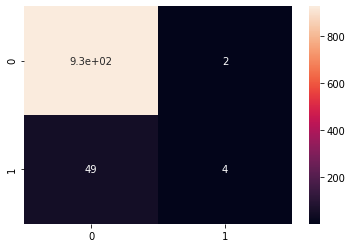

In [103]:
sns.heatmap(confusion_matrix, annot = True)

In [111]:
#Accuracy, Precision and Recall scores
print(metrics.accuracy_score(y_test, y_predicted))
#94% of the time it is accurate. (TN+TP)/Total

#Preciison
print(metrics.precision_score(y_test, y_predicted))
#66.67% of the time, there are true Yeses in the total predicted Yes. 
#33.33% of the time, there are False positives


#Recall scores
print(metrics.recall_score(y_test, y_predicted))
#8% of the time, you are predicting true positives from all the True positive cases
#Very poor recall performance

0.9480651731160896
0.6666666666666666
0.07547169811320754


In [117]:
#library function for classification scores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.67      0.08      0.14        53

    accuracy                           0.95       982
   macro avg       0.81      0.54      0.55       982
weighted avg       0.93      0.95      0.93       982



In [122]:
from sklearn.metrics import roc_auc_score

fpr, tpr, _ = roc_auc_score(y_test, y_predicted)

TypeError: cannot unpack non-iterable numpy.float64 object

In [124]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_predicted)

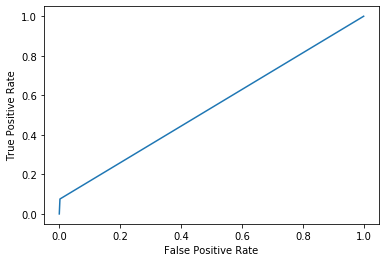

In [126]:
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()